<a href="https://colab.research.google.com/github/StephenJohnson-CardiffUni/Astro/blob/main/FormAndEvoOfStars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Formation and evolution of stars continuous assessment 1'''
#rememeber to upload mv_function.txt
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as curve_fit

In [2]:
'''Load file into an array'''

Spec,MV,n,n_unc,dndm,dndm_unc = np.genfromtxt('/content/mv_function.txt', dtype=['U15','<f8','<f8','<f8','<f8','<f8'],skip_header=1,unpack=True)

In [3]:
print(MV)

[1.34 1.48 1.55 1.76 1.84 1.89 2.07 2.29 2.3  2.51 2.79 2.99 3.08 3.23
 3.4  3.7  3.87 4.01 4.15 4.45 4.5  4.79 4.86 4.94 4.98 5.13 5.18 5.32
 5.55 5.76 5.91 6.19 6.57 7.04 7.25]


In [55]:
'''Convert from Magnitude to Mass'''

logM = np.empty(MV.size)
M = np.empty(MV.size)

for i in range(MV.size):
  logM[i]	=	0.4790 - 0.1219*MV[i] + 0.004940*(MV[i]**2)
  M[i] = 10**logM[i]



In [56]:
print(logM)
print(M)

[ 0.32452426  0.30940858  0.30192335  0.27975814  0.27142886  0.26625517
  0.24783441  0.22575485  0.2247626   0.20415349  0.17735245  0.15868309
  0.15041082  0.13680153  0.1216464   0.0955986   0.08123289  0.06961669
  0.05819415  0.03436935  0.030485    0.00844285  0.00324682 -0.00263222
 -0.00554802 -0.01634151 -0.01988994 -0.02969414 -0.04538065 -0.05924666
 -0.06888419 -0.08627947 -0.10864839 -0.1343417  -0.14511625]
[2.11117514 2.03895939 2.00411828 1.90439987 1.86822364 1.84609979
 1.76943415 1.68172451 1.67788658 1.60012347 1.50436234 1.44106342
 1.41387435 1.37025541 1.3232637  1.24623114 1.2056823  1.17386105
 1.14338937 1.08235406 1.0727166  1.01963058 1.0075041  0.99395743
 0.98730645 0.9630714  0.95523462 0.93391179 0.90078128 0.87247571
 0.85332764 0.81982382 0.77866671 0.73393619 0.71595174]


In [35]:
'''Do a curve_fit'''
def powerFit(x,a,b):
  return b*(x**a)

popt, pcov = curve_fit(powerFit, M, n,[-0.3,1.5])

'''it fails hard.. no idea why'''

Text(0.5, 1.0, 'Mass vs Number Density')

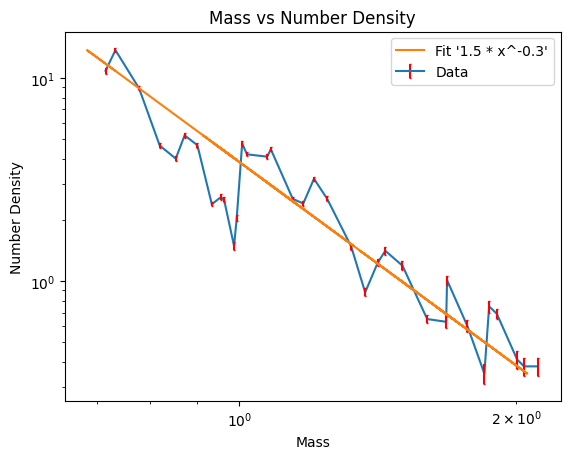

In [58]:
fig, ax = plt.subplots()
plot = ax.errorbar(M,n,n_unc,ecolor="red",capsize=1,barsabove=True, label="Data")
#plot = ax.errorbar(dndm,n,n_unc,dndm_unc,ecolor="blue",capsize=1,barsabove=True)
plot = ax.plot(powerFit(n,-0.3,1.5),n, label="Fit '1.5 * x^-0.3'")
ax.set_yscale('log')
ax.set_ylabel('Number Density')
ax.set_xscale('log')
ax.set_xlabel('Mass')
ax.legend()
plt.title("Mass vs Number Density")

#lables

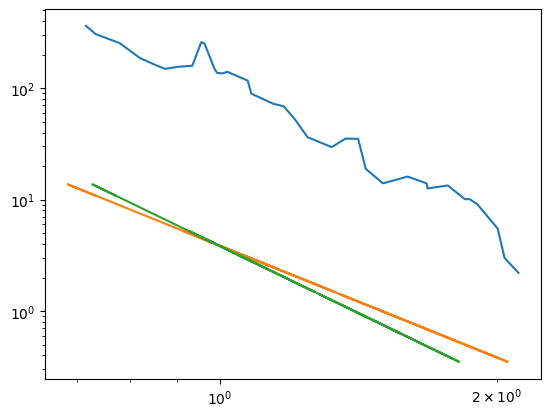

In [70]:
'''Q1b'''

plt.loglog(M,dndm)
plt.loglog(powerFit(n,-0.3,1.5),n,"-", label="Fit '1.5 * x^-0.3'")
plt.loglog(powerFit(n,-0.25,1.4),n)